Simple Workflow Graph using langgraph

In [2]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

In [3]:
def start_play(state:State):
    print("Start Play  node has been called")
    return {"graph_info":state['graph_info']+" -> Start Play"}
# start_play({"graph_info":"Initial State"})
def cricet_game(state:State):
    print("Cricket Game node has been called")
    return {"graph_info":state['graph_info']+" -> Cricket Game"}
# cricet_game({"graph_info":"Initial State"})
def football_game(state:State):
    print("Football Game node has been called")
    return {"graph_info":state['graph_info']+" -> Football Game"}

In [4]:
import random
from typing import Dict, Literal
def random_play(state:State) -> Literal['cricket','football']:
    if random.random() > 0.5:
        return 'cricket'
    else:
        return 'football'
random_play({"graph_info":"Initial State"})

'cricket'

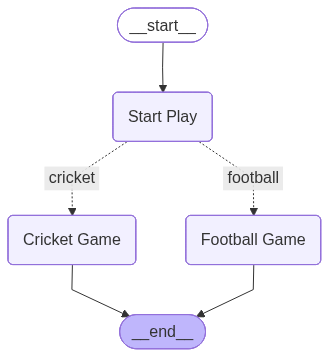

In [12]:
from langgraph.graph import StateGraph,START,END
from IPython.display import Image, display
graph = StateGraph(State)
graph.add_node("Start Play", start_play)
graph.add_node("Cricket Game", cricet_game)
graph.add_node("Football Game", football_game)
graph.add_conditional_edges("Start Play", random_play, {"cricket": "Cricket Game", "football": "Football Game"})
graph.set_entry_point("Start Play")
compiled_graph = graph.compile()
display(Image(compiled_graph.get_graph().draw_mermaid_png()))